# Proyecto EDA (Análisis de Datos Exploratorio) sobre carreras relacionadas a Data Science
## I. Objetivo

- Determinar como se relaciona el salario con factores como: carrera, sector, o tipo de propiedad.

## II. Hipótesis

1. El Salario Promedio Anual de un Data Scientist a nivel general es el más alto
2. El sector de IT a nivel general tiene los salarios más altos
3. El sector de IT tiene la mayor cantidad de ofertas de trabajo

## 1. Importación de librerías

Antes de iniciar, se importan todas las librerías que se necesiten para poder trabajar, y se realizan configuraciones previas (en el caso de matplotlib, para modificar el estilo o para activar el autolayout)

In [1]:
# En caso de no estar instalada esta librería, quitar el #.

# !pip install country_list

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from country_list import countries_for_language
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords

# Si no está descargado el paquete de nltk, quitar comentarios.
# nltk.download('stopwords')
sw = stopwords.words('english')
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

## 2. Importación de Datasets y Clasificación

Se importan los Datasets/Conjuntos de datos a utilizar como DataFrames utilizando Pandas, eliminando al mismo tiempo columnas innecesarias de cada uno de los Datasets como 'Unnamed: 0' o 'index'.

Además, para no perder de vista la categoría/carrera de la que vienen los registros de cada DataFrame, se agrega una nueva columna a cada uno indicando la carrera (Data Science, Data Analyst o Data Engineer).

In [3]:
# Se extrae la información de un documento online
de = pd.read_csv('https://raw.githubusercontent.com/picklesueat/data_jobs_data/master/DataEngineer.csv',  index_col=False)
de['Category'] = 'Data Engineer'

ds = pd.read_csv('https://raw.githubusercontent.com/picklesueat/data_jobs_data/master/DataScientist.csv',  index_col=False)
ds['Category'] = 'Data Scientist'

da = pd.read_csv('https://raw.githubusercontent.com/picklesueat/data_jobs_data/master/DataAnalyst.csv',  index_col=False)
da['Category'] = 'Data Analyst'

# Se eliminan las columnas de un DataFrame en particular que son inútiles
ds = ds.drop(columns = ['Unnamed: 0', 'index'])

## 3. Fusión de los Datasets

Para poder comparar la información de los 3 datasets anteriores, resulta más sencillo tenerlos todos en un mismo DataFrame. Esto facilita las tareas de limpieza y también de categorización (ya que se realiza a un sólo DataFrame, y no se realiza individualmente a los 3 DataFrames anteriores):

In [4]:
# Se concatenan los tres DataFrames anteriores en uno solo
df = pd.concat([de, ds, da])
df.head(5)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Category
0,Data Engineer,$80K-$150K (Glassdoor est.),Company Description\nSagence is a management a...,4.5,Sagence\n4.5,"New York, NY","Chicago, IL",1 to 50 employees,2009,Company - Private,Consulting,Business Services,$10 to $25 million (USD),"WCI Consulting, PwC",-1,Data Engineer
1,Senior Data Engineer (Healthcare Domain experi...,$80K-$150K (Glassdoor est.),"Key Responsibilities\n\n- Architect, build, an...",3.4,Enterprise Integration\n3.4,"New York, NY","Jacksonville, FL",51 to 200 employees,1998,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),-1,-1,Data Engineer
2,Data Engineers,$80K-$150K (Glassdoor est.),Overview\n\nJob description\n\nPosition Overvi...,5.0,Maestro Technologies\n5.0,"New York, NY","Trenton, NJ",51 to 200 employees,2003,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1,-1,Data Engineer
3,Client Trade Support Engineer,$80K-$150K (Glassdoor est.),About the Position\n\n\nThis position will sup...,4.8,Jane Street\n4.8,"New York, NY","New York, NY",501 to 1000 employees,2000,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1,Data Engineer
4,Data Engineer,$80K-$150K (Glassdoor est.),Data Engineer\n\nJob Details\nLevel\nExperienc...,3.7,GNY Insurance Companies\n3.7,"New York, NY","New York, NY",201 to 500 employees,1914,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),"Travelers, Chubb, Crum & Forster",True,Data Engineer


## 4. Limpieza de columnas y filas

Ya que la variable de interés en este análisis es el ***'Salary Estimate'***, se eliminan algunas columnas que no aportan mucho al análisis como 'Size', 'Founded', 'Easy Apply', 'Competitors' o 'Revenue'. También se eliminan los registros duplicados.

De igual manera, se eliminan filas en concreto en base al 'Salary Estimate' dependiendo de dos condiciones:
- Que contenga la palabra ' Per Hour' (para quedarnos únicamente con los salarios anuales)
- Cuyo valor sea igual a -1 (una forma de representar un nulo)

Luego de estos cambios, reseteamos el index de todos los registros.

In [5]:
# Eliminación de columnas inútiles
df = df.drop(columns = ['Size', 'Founded', 'Easy Apply', 'Competitors', 'Headquarters', 'Industry', 'Revenue'])

# Eliminación de registros duplicados
df = df.drop_duplicates()

# Eliminación de registros que cumplan ciertos requisitos no deseados
df = df[((df['Salary Estimate'].str.contains('Per Hour'))==False) & (df['Salary Estimate'] != '-1')]

# Se resetea el index
df = df.reset_index(drop=True)
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Type of ownership,Sector,Category
0,Data Engineer,$80K-$150K (Glassdoor est.),Company Description\nSagence is a management a...,4.5,Sagence\n4.5,"New York, NY",Company - Private,Business Services,Data Engineer
1,Senior Data Engineer (Healthcare Domain experi...,$80K-$150K (Glassdoor est.),"Key Responsibilities\n\n- Architect, build, an...",3.4,Enterprise Integration\n3.4,"New York, NY",Company - Private,Information Technology,Data Engineer
2,Data Engineers,$80K-$150K (Glassdoor est.),Overview\n\nJob description\n\nPosition Overvi...,5.0,Maestro Technologies\n5.0,"New York, NY",Company - Private,Information Technology,Data Engineer
3,Client Trade Support Engineer,$80K-$150K (Glassdoor est.),About the Position\n\n\nThis position will sup...,4.8,Jane Street\n4.8,"New York, NY",Company - Private,Finance,Data Engineer
4,Data Engineer,$80K-$150K (Glassdoor est.),Data Engineer\n\nJob Details\nLevel\nExperienc...,3.7,GNY Insurance Companies\n3.7,"New York, NY",Company - Private,Insurance,Data Engineer
...,...,...,...,...,...,...,...,...,...
11971,Data Analyst (Power BI + SAP),$51K-$93K (Glassdoor est.),"KORE1, a nationwide provider of staffing and r...",4.9,KORE1 Technologies\n4.9,"San Jose, CA",Company - Private,Business Services,Data Analyst
11972,Technical Business or Data Analyst,$46K-$72K (Glassdoor est.),Job Description\nHi\n\nHope you are doing grea...,4.4,Adwait Algorithm\n4.4,"Santa Clara, CA",Company - Private,Information Technology,Data Analyst
11973,Data Analyst Junior,$44K-$82K (Glassdoor est.),Job Description\nJob description\nInterpret da...,5.0,"Staffigo Technical Services, LLC\n5.0","Fremont, CA",Company - Private,Information Technology,Data Analyst
11974,Sr. HR Data Analyst,$44K-$82K (Glassdoor est.),POSITION SUMMARY:\n\nThe Sr. HR Data Analyst p...,3.5,Cepheid\n3.5,"Sunnyvale, CA",Company - Private,Biotech & Pharmaceuticals,Data Analyst


## 5. Limpieza de datos
### 5.1. Pasando 'Job Title' y 'Job Description' a minúsculas

Pasar los valores de estas columnas a minúscula ayuda a que todos los valores estén al mismo nivel, ayudando a encontrar las palabras con más fácilidad ya que se evita que una palabra tenga múltiples variaciones. Por ejemplo: 'ScientisT', 'scientisT', 'SCIENTIST', etc.

In [6]:
df['Job Title']= df['Job Title'].str.lower()
df['Job Description']= df['Job Description'].str.lower()

### 5.2. Obteniendo Salario Promedio Anual del rango salarial en 'Salary Estimate'

Para poder obtener el Salario Promedio Anual, se realizó lo siguiente:
- Se realizó una copia del DataFrame original para realizar las modificaciones necesarias
- Se reemplazaron todas las letras y espacios, para obtener los números y el guión que los divide (ej. 115-125). Esto no elimina el paréntesis con texto que todos los registros tienen.
- Para eliminar los paréntesis se utiliza split
- Se separan los números en base al guión con split
- Se obtiene el promedio del rango minimo y el máximo
- Se modifica el DataFrame original con los valores convertidos a numéricos

In [7]:
# Limpieza de los valores de 'Salary Estimate' para poder obtener el promedio
salarios = df['Salary Estimate'].copy()
for i in range(len(df['Salary Estimate'])):       
    salarios[i] = salarios[i].replace("$", "").replace("K", "").replace(" ", "")
    salarios[i], sobrante = salarios[i].split("(")
    salmin, salmax = salarios[i].split('-')
    salarios[i] = (float(salmin) + float(salmax)) / 2
df['Salary Estimate'] = pd.to_numeric(salarios)

### 5.3. Eliminando el Rating de la compañia

In [8]:
# Eliminación de valores ajenos al nombre de la compañía
texto = df['Company Name'].copy().astype(str)    
for i in range(len(df['Company Name'])):
    if "\n" in texto[i]:
        texto[i], sobrante = texto[i].split("\n")    
df['Company Name'] = texto

### 5.4. Obteniendo país y estado de la columna 'Location'

In [9]:
# Diccionario de nombres de países en inglés
paises = dict(countries_for_language('en'))

# Se obtienen los valores del diccionario y se convierten en listas
paises = list(paises.values())

# Se crean columnas nuevas con el valor de None
df = df.assign(States = 'None')
df = df.assign(Country = 'None')

# Se copian los valores de la columna 'Location' del DataFrame original en una nueva variable
location = df['Location'].copy().astype(str)
pais = []
estado = []

# Lista de los estados de USA
list_estados = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado","Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois",
  "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland", "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
  "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York", "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
  "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah","Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]

# Diccionario de los estados de USA
dic_estados = {'AK': 'Alaska','AL': 'Alabama','AR': 'Arkansas','AS': 'American Samoa','AZ': 'Arizona','CA': 'California','CO': 'Colorado','CT': 'Connecticut',
        'DC': 'District of Columbia','DE': 'Delaware','FL': 'Florida','GA': 'Georgia','GU': 'Guam','HI': 'Hawaii','IA': 'Iowa','ID': 'Idaho','IL': 'Illinois',
        'IN': 'Indiana','KS': 'Kansas','KY': 'Kentucky','LA': 'Louisiana','MA': 'Massachusetts','MD': 'Maryland','ME': 'Maine','MI': 'Michigan','MN': 'Minnesota',
        'MO': 'Missouri','MP': 'Northern Mariana Islands','MS': 'Mississippi','MT': 'Montana','NA': 'National','NC': 'North Carolina','ND': 'North Dakota',
        'NE': 'Nebraska','NH': 'New Hampshire','NJ': 'New Jersey','NM': 'New Mexico','NV': 'Nevada','NY': 'New York','OH':'Ohio','OK': 'Oklahoma','OR': 'Oregon',
        'PA': 'Pennsylvania','PR': 'Puerto Rico','RI': 'Rhode Island','SC': 'South Carolina','SD': 'South Dakota','TN': 'Tennessee','TX': 'Texas','UT': 'Utah',
        'VA': 'Virginia','VI': 'Virgin Islands','VT': 'Vermont','WA': 'Washington','WI': 'Wisconsin','WV': 'West Virginia','WY': 'Wyoming'}

for i in range(location.shape[0]):
    
    # Si un registro no contiene una coma
    if location[i].__contains__(", ") != True: 
        # se verifica si el valor de location[i] esta el listado de paises
        if location[i] in paises:
            location[i] = 'Unknow, ' + location[i]
        # o en el de estados
        elif location[i] in list_estados:
            location[i] = location[i] + ', United States'
        # o si no aparece en ninguno
        else:
            location[i] = location[i] + ', Unknow'
    
    # Algunos registros tienen más de dos comas, por lo que el split puede devolver 3 valores. Por eso se evalua la longitud de resultados que devuelve el split.
    if len(location[i].split(', ')) > 2:
        _, zona, loc = location[i].split(', ')
    else:
        zona, loc = location[i].split(', ')
    
    # Si la locacion (que es el estado en forma de acrónimo o con nombre completo) existe en el diccionario o lista, se agrega como país a USA
    # Caso contrario, se agrega el valor que trae la variable loc
    if (loc in dic_estados) or (loc in list_estados):
        pais.append('United States')
    else:
        pais.append(loc)
        
    # Finalmente, si la zona (que es el estado en forma de acrónimo o con nombre completo) existe en el diccionario o lista, se agrega como estado
    # Caso contrario, se agrega el valor que trae la variable zona
    if (zona in dic_estados):
        estado.append(dic_estados[zona])
    elif (zona in list_estados):
        estado.append(zona)
    else:
        estado.append(zona)

# Se cambian los valores de None de la columna 'States' por los resultados que se obtuvieron en la variable 'estado'
df['States'] = estado

# Se cambian los valores de None de la columna 'Country' por los resultados que se obtuvieron en la variable 'pais'
df['Country'] = pais

### 5.5. Eliminando palabras innecesarias de 'Job Title' y 'Job Description'

In [10]:
descriptions = []
for i in range(df['Job Description'].shape[0]):
    # Se une todo el texto en una sola línea en una variable según un registro
    text = ''.join(df['Job Description'][i])
    # Se reemplazan caracteres especiales
    text = text.replace("\n", " ").replace(".", " ").replace(","," ").replace(";"," ").replace("  "," ")
    # Se agrega esta descripcion a una lista, cuya posición es relativa a la posición del registro original en el DataFrame
    descriptions.append(text)
    
# Se sustituyen los valores del DataFrame original por los que vienen en la lista
df['Job Description'] = descriptions

In [11]:
# Funcionamiento igual al procedimiento anterior.
titles = []
for i in range(df['Job Title'].shape[0]):
    text = ''.join(df['Job Title'][i])
    text = text.replace("\n", " ").replace(".", " ").replace(","," ").replace(";"," ").replace("  "," ")
    titles.append(text)
df['Job Title'] = titles

In [12]:
# Se eliminan las stopwords de cada registro en las columnas 'Job Description' y 'Job Title'
df['Job Description'] = df['Job Description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (sw)]))
df['Job Title'] = df['Job Title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (sw)]))

## 6. Verificando el DataFrame Actual

Para ello, únicamente llamamos al DataFrame para que podamos tener una vista superficial de cómo ha quedado luego de los diversos cambios que se le realizaron

In [13]:
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Type of ownership,Sector,Category,States,Country
0,data engineer,115.0,company description sagence management advisor...,4.5,Sagence,"New York, NY",Company - Private,Business Services,Data Engineer,New York,United States
1,senior data engineer (healthcare domain experi...,115.0,key responsibilities - architect build maintai...,3.4,Enterprise Integration,"New York, NY",Company - Private,Information Technology,Data Engineer,New York,United States
2,data engineers,115.0,overview job description position overview: se...,5.0,Maestro Technologies,"New York, NY",Company - Private,Information Technology,Data Engineer,New York,United States
3,client trade support engineer,115.0,position position support jane street’s client...,4.8,Jane Street,"New York, NY",Company - Private,Finance,Data Engineer,New York,United States
4,data engineer,115.0,data engineer job details level experienced jo...,3.7,GNY Insurance Companies,"New York, NY",Company - Private,Insurance,Data Engineer,New York,United States
...,...,...,...,...,...,...,...,...,...,...,...
11971,data analyst (power bi + sap),72.0,kore1 nationwide provider staffing recruiting ...,4.9,KORE1 Technologies,"San Jose, CA",Company - Private,Business Services,Data Analyst,San Jose,United States
11972,technical business data analyst,59.0,job description hi hope great please go jd let...,4.4,Adwait Algorithm,"Santa Clara, CA",Company - Private,Information Technology,Data Analyst,Santa Clara,United States
11973,data analyst junior,63.0,job description job description interpret data...,5.0,"Staffigo Technical Services, LLC","Fremont, CA",Company - Private,Information Technology,Data Analyst,Fremont,United States
11974,sr hr data analyst,63.0,position summary: sr hr data analyst position ...,3.5,Cepheid,"Sunnyvale, CA",Company - Private,Biotech & Pharmaceuticals,Data Analyst,Sunnyvale,United States


## 7. Exportando a CSV la data limpia

Antes de exportar, es necesario verificar que los valores de ***Salary Estimate*** estén multiplicados por mil. Esto se debe a que la unidad de medición utilizada en el DataFrame original eran las K en sustitución de los miles, por lo que solo se tiene la "cabecera" de estos salarios y pueden dar resultados erroneos al importarlos y analizarlos en otra herramienta de graficación como Power BI.

Una vez se ha importado la información, se regresa la informacióna a su estado original para trabajar de forma más sencilla con los gráficos de matplotlib

In [14]:
# Previamente, se multiplica la columna "Salary Estimate" por mil
df['Salary Estimate'] = df['Salary Estimate'] * 1000

# Con esto se crea un archivo CSV con la información del DataFrame en el lugar donde esté guardado el notebook
df.to_csv('DS_Jobs.csv', index = False)

# Se regresa al valor original
df['Salary Estimate'] = df['Salary Estimate'] / 1000

## 8. Análisis generales de los datos
***Los valores en la columna Salary Estimate están en K(miles), por lo que un valor de, por ejemplo, 115, significa 115k - 115,000***
### 8.1. Mayor, menor y promedio del Salario Anual

In [15]:
print(f'El Salario Estimado Anual máximo es de: ${df["Salary Estimate"].max()}K\nEl Salario Estimado Anual mínimo es de ${df["Salary Estimate"].min()}K\nEl Salario Estimado Anual promedio es de ${np.round(df["Salary Estimate"].mean(),2)}K')

El Salario Estimado Anual máximo es de: $225.0K
El Salario Estimado Anual mínimo es de $33.0K
El Salario Estimado Anual promedio es de $90.04K


### 8.2. Mayor, menor y promedio del Salario Anual por Carrera

In [16]:
df.groupby('Category')['Salary Estimate'].agg(["max","min","mean"])

,max,min,mean
Category,,,
Data Analyst,150.0,33.0,72.416098
Data Engineer,217.5,38.5,100.840421
Data Scientist,225.0,43.5,108.295910


### 8.3. Mayor, Menor y promedio del Salario Anual por Sector

In [17]:
df[df['Sector']!='-1'].groupby('Sector')['Salary Estimate'].agg(["max","min","mean"])

,max,min,mean
Sector,,,
Accounting & Legal,217.5,33.0,89.104396
Aerospace & Defense,190.0,39.0,85.667969
Agriculture & Forestry,161.0,53.0,87.900000
"Arts, Entertainment & Recreation",225.0,36.0,94.340000
Biotech & Pharmaceuticals,217.5,38.5,103.398795
Business Services,225.0,33.5,85.409336
"Construction, Repair & Maintenance",177.5,39.5,88.351852
Consumer Services,183.0,40.0,92.939655
Education,193.5,36.5,85.053785


### 8.4. Mayor, Menor y promedio del Salario Anual por Tipo de Propiedad de la compañía

In [18]:
df[df['Type of ownership']!='-1'].groupby('Type of ownership')['Salary Estimate'].agg(["max","min","mean"])

,max,min,mean
Type of ownership,,,
College / University,193.5,36.5,82.827485
Company - Private,225.0,33.0,89.055000
Company - Public,225.0,33.0,95.178370
Contract,205.0,36.0,83.128571
Franchise,122.0,47.5,78.750000
Government,205.0,33.5,83.495575
Hospital,205.0,33.0,83.606742
Nonprofit Organization,205.0,36.0,83.306537
Other Organization,130.0,52.5,79.657143


### 8.5. Porcentaje de Ofertas de Empleo provenientes de Estados Unidos

In [19]:
porcentaje = round(df[df['Country'] == 'United States']['Country'].count() / len(df['Country']) * 100,2)
print(f'El porcentaje de Ofertas de Empleo de USA es del {porcentaje}%')

El porcentaje de Ofertas de Empleo de USA es del 99.55%


### 8.6. Cantidad de Ofertas de Empleo por Carrera

In [20]:
df.groupby('Category')['Job Title'].agg(["count"])

,count
Category,
Data Analyst,5572
Data Engineer,2516
Data Scientist,3888


### 8.7. Cantidad de Ofertas de Empleo por Sector

In [21]:
df[df['Sector']!='-1'].groupby('Sector')['Job Title'].agg(["count"])

,count
Sector,
Accounting & Legal,182
Aerospace & Defense,256
Agriculture & Forestry,10
"Arts, Entertainment & Recreation",25
Biotech & Pharmaceuticals,415
Business Services,2410
"Construction, Repair & Maintenance",54
Consumer Services,58
Education,251


### 8.8. Cantidad de Ofertas de Empleo por Tipo de Propiedad de la Compañía

In [22]:
df[df['Type of ownership']!='-1'].groupby('Type of ownership')['Job Title'].agg(["count"])

,count
Type of ownership,
College / University,171
Company - Private,6400
Company - Public,3019
Contract,70
Franchise,6
Government,226
Hospital,89
Nonprofit Organization,566
Other Organization,35


## 9. Graficando los datos
### 9.1. Gráfico de barras horizontal de Salario Promedio Anual por carrera

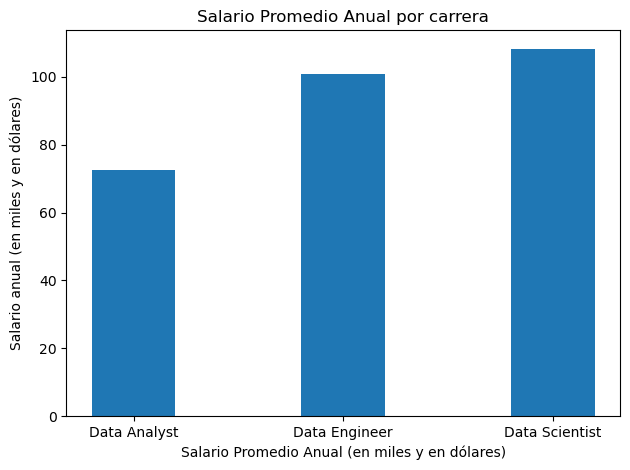

In [23]:
plt.rcdefaults()
fig, ax = plt.subplots()

w = 0.4
salaries = df.groupby('Category')['Salary Estimate'].mean()
categories = salaries.index.tolist()

y_pos = np.arange(len(salaries.index.tolist()))
sals = []

for i in range(len(salaries)):
    sals.append(salaries[i])

grap1 = ax.bar(categories, sals, w, align='center')
ax.set_xlabel('Salario Promedio Anual (en miles y en dólares)')
ax.set_ylabel('Salario anual (en miles y en dólares)')
ax.set_title('Salario Promedio Anual por carrera')

plt.tight_layout()
# fig.savefig("sal_carrera.png")
plt.show()

### 9.2. Gráfico de líneas de Salario Promedio Anual por industria

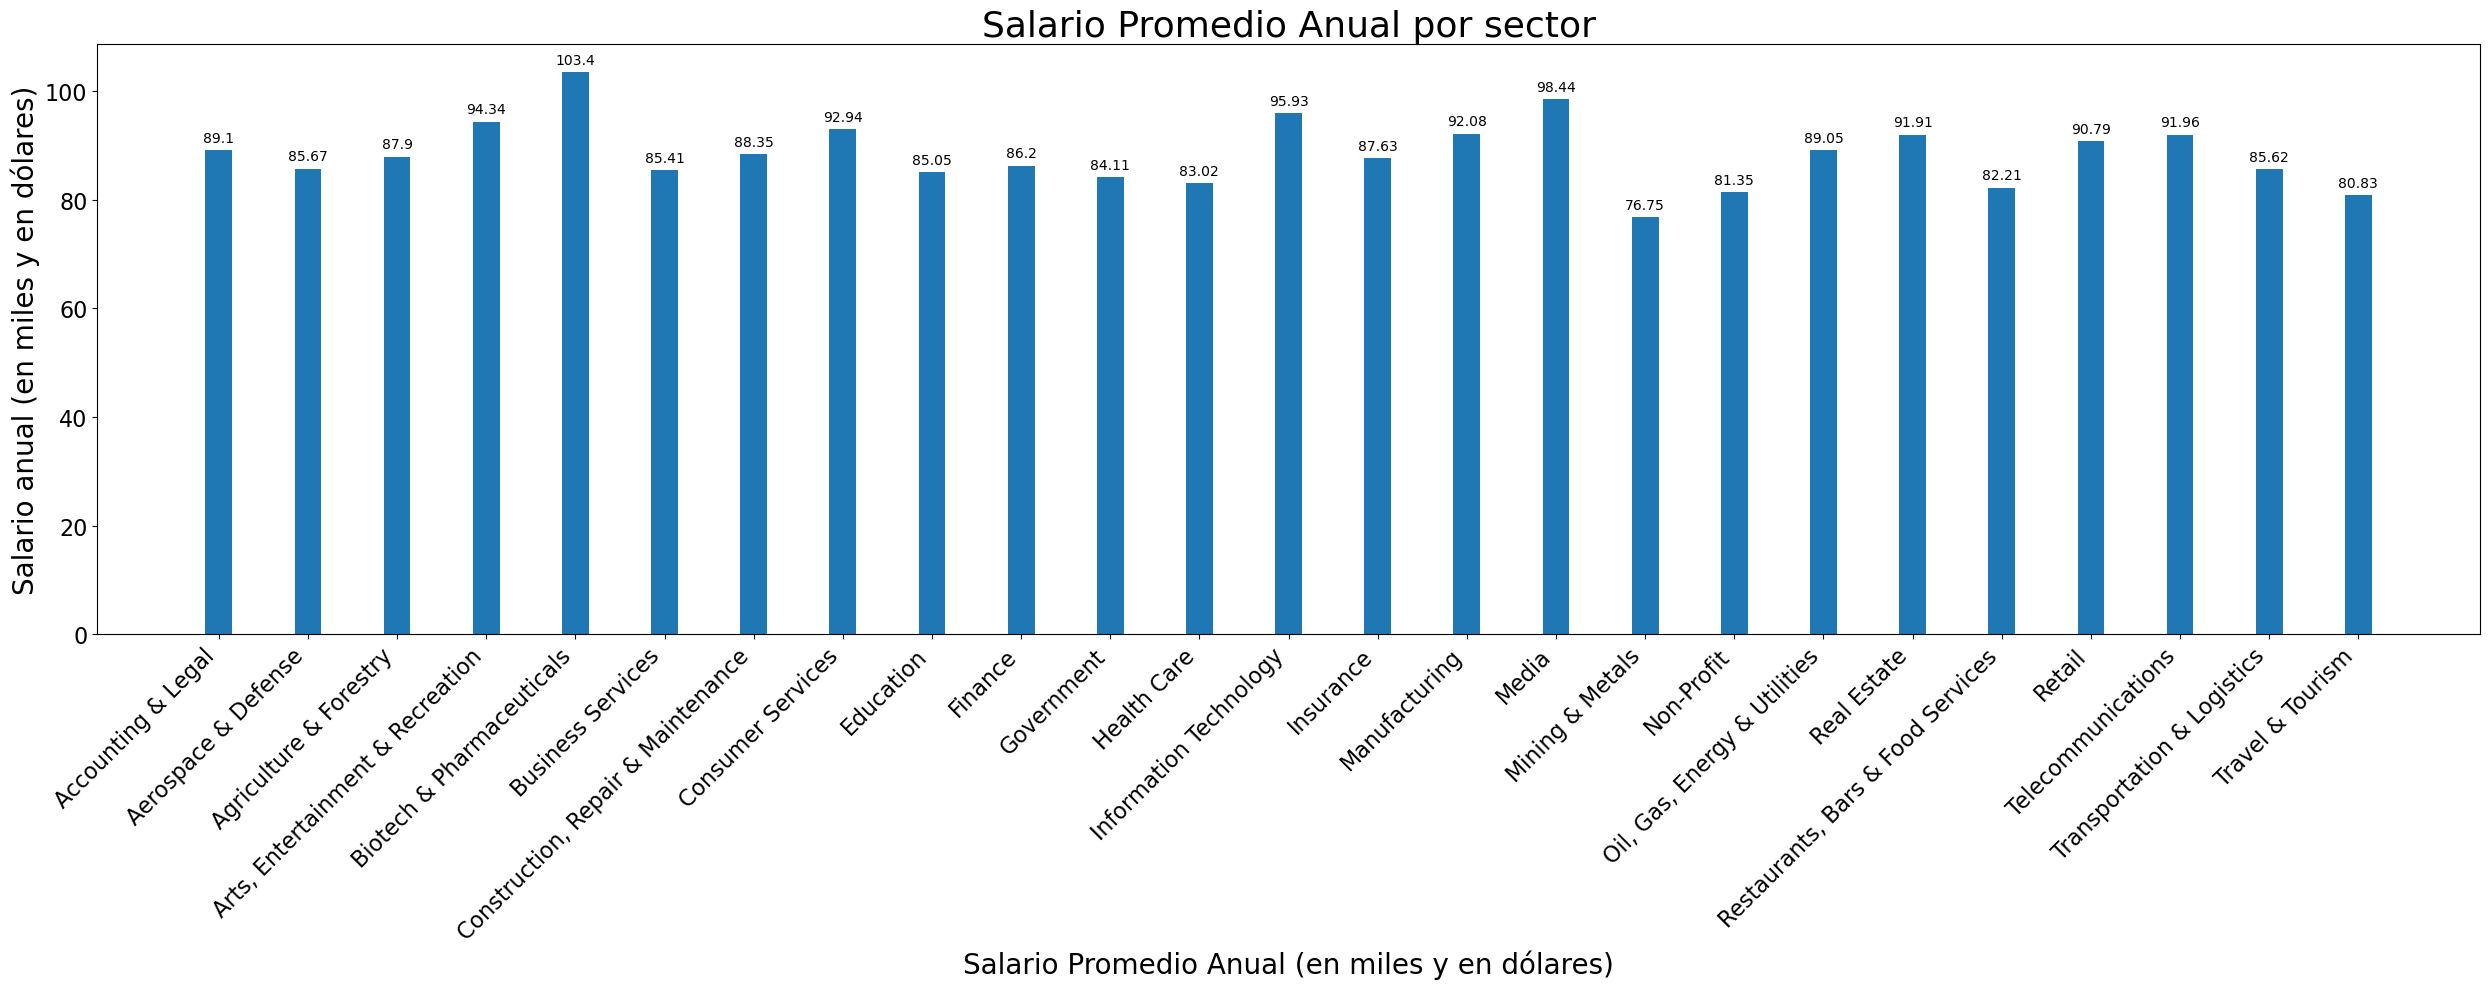

In [24]:
plt.rcParams['figure.figsize'] = [25, 10] 
fig, ax = plt.subplots()

w = 0.3
salaries = np.round(df[df['Sector'] != '-1'].groupby('Sector')['Salary Estimate'].mean(),2)
y_pos = np.arange(len(salaries.index.tolist()))
sals = []

for i in range(len(salaries)):
    sals.append(salaries[i])
    
sectors = salaries.index.tolist()
ax.bar(sectors, sals, w)
plt.xticks(fontsize=16)
fig.autofmt_xdate(rotation=45)
plt.yticks(fontsize=16)
plt.xlabel('Salario Promedio Anual (en miles y en dólares)', fontsize=20)
ax.set_ylabel('Salario anual (en miles y en dólares)', fontsize=20)
plt.title('Salario Promedio Anual por sector', fontsize=26)

rects = ax.patches

for rect, label in zip(rects, salaries):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 1, label,
            ha='center', va='bottom')

plt.tight_layout()
# fig.savefig("sal_sector.png")
plt.show();

### 9.3. Gráficos de barra agrupados de Salario anual promedio según sector y carrera

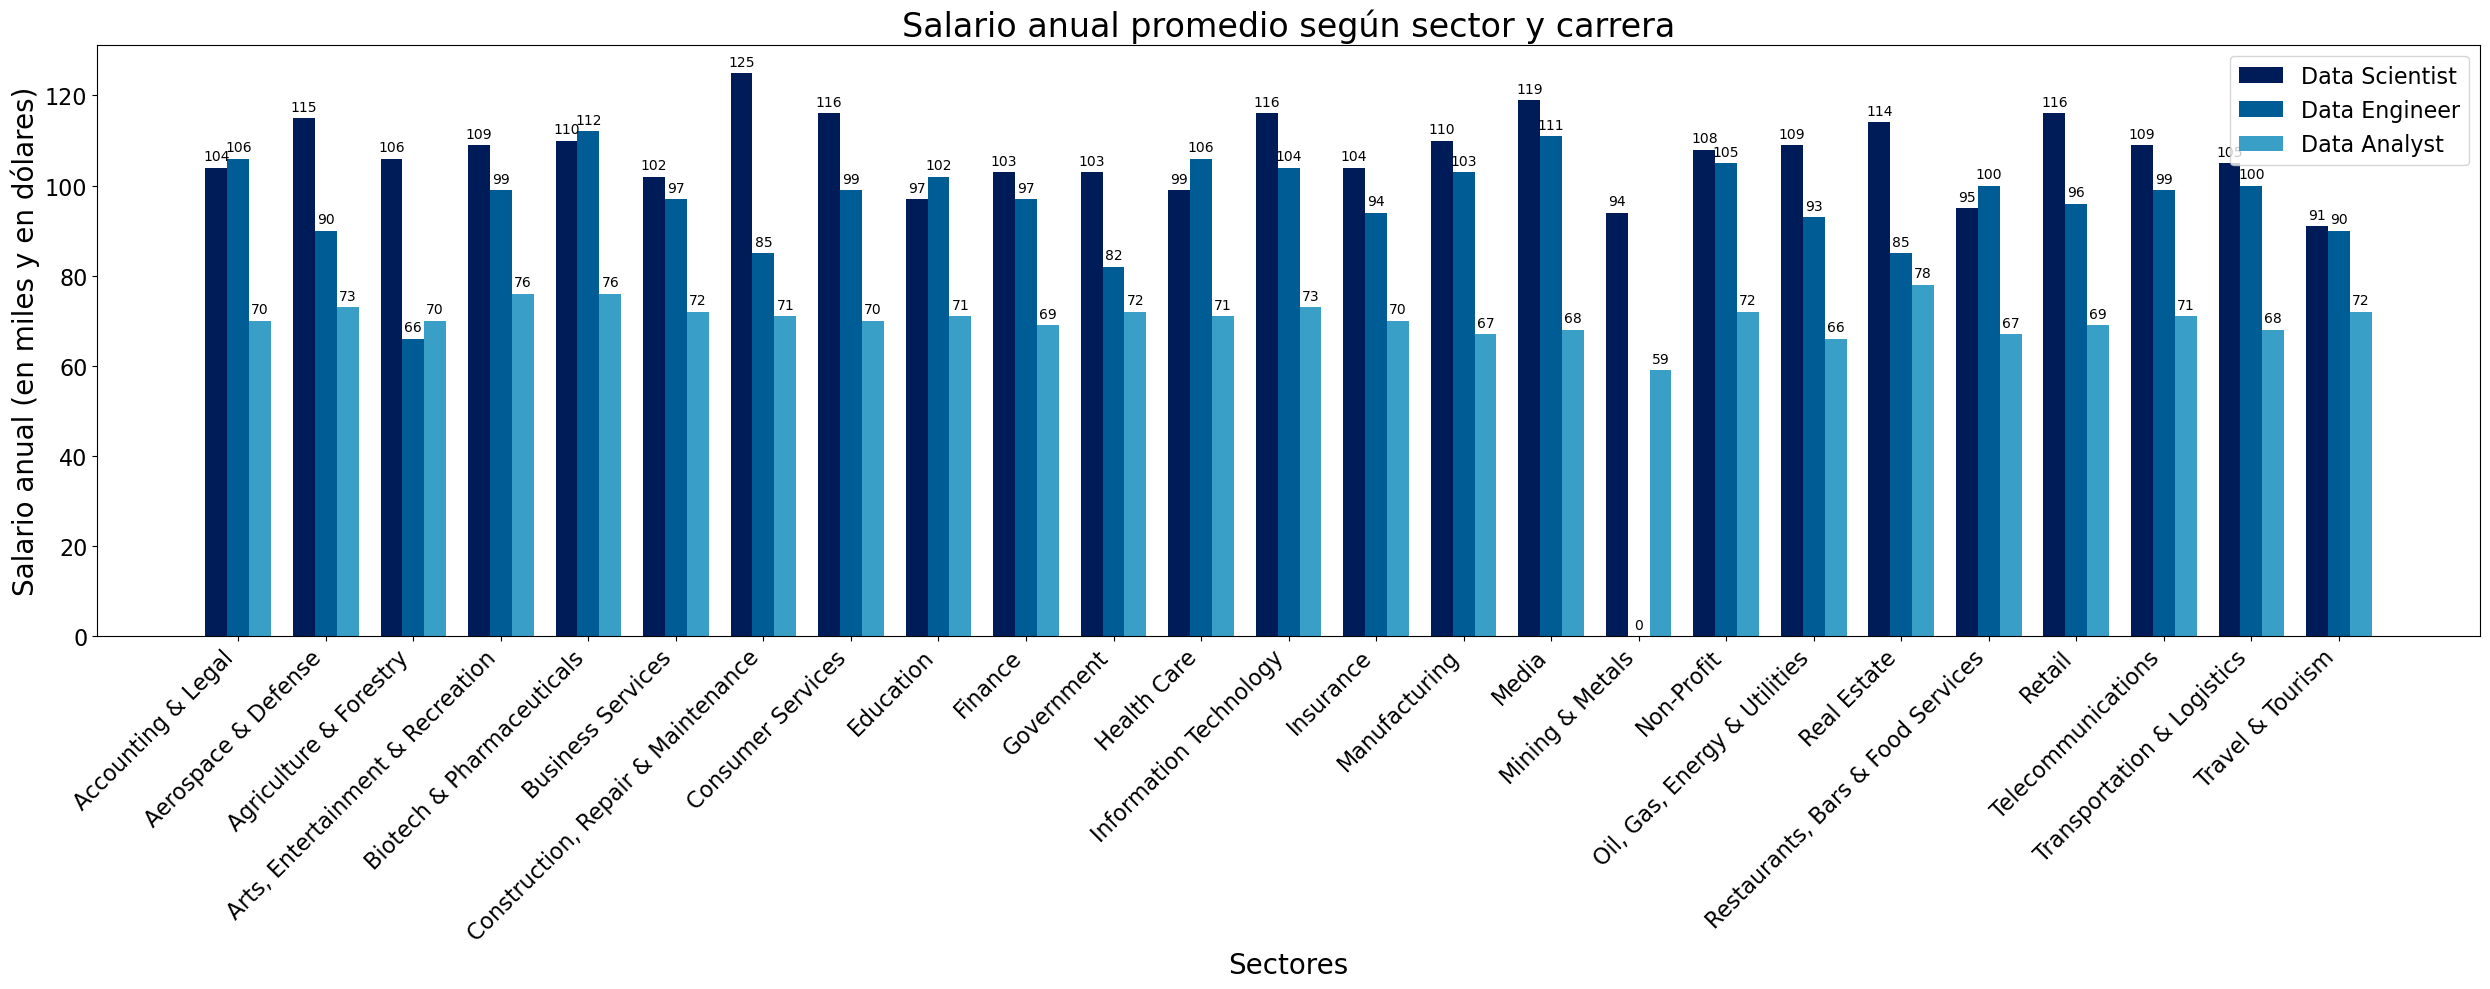

In [25]:
plt.rcParams['figure.figsize'] = [25, 10] 
fig, ax = plt.subplots()

w = 0.25
x = list(df[df['Sector'] != '-1']['Sector'].sort_values(ascending=True).unique())
pivote = df[df['Sector'] != '-1'].pivot_table('Salary Estimate', index=['Sector'],columns=['Category'], aggfunc='mean', fill_value=0).astype(int)

DA = []
DE = []
DS = []

for column in pivote.columns.values:
    if column == 'Data Analyst':
        DA = pivote[column].tolist()
    if column == 'Data Engineer':
        DE = pivote[column].tolist()
    if column == 'Data Scientist':
        DS = pivote[column].tolist()

bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
bar3 = [i+w for i in bar2]

graf1 = ax.bar(bar1, DS, w, color='#001c58', label='Data Scientist')
graf3 = ax.bar(bar2, DE, w, color='#005c94', label='Data Engineer')
graf2 = ax.bar(bar3, DA, w, color='#3a9fc7', label='Data Analyst')

ax.set_xlabel('Sectores', fontsize=20)
ax.set_ylabel('Salario anual (en miles y en dólares)', fontsize=20)
ax.set_title('Salario anual promedio según sector y carrera', fontsize=24)
plt.xticks(bar1+w, x, fontsize=16)
fig.autofmt_xdate(rotation=45)
plt.yticks(fontsize=16)
ax.legend(prop={'size': 16})

def autolabel(rects, xpos='center'):
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')

autolabel(graf1)
autolabel(graf2)
autolabel(graf3)

plt.tight_layout()
# fig.savefig("sal_sector_carrera.png")
plt.show();

### 9.4. Rating de Ofertas de Empleo según Sector y Carrera

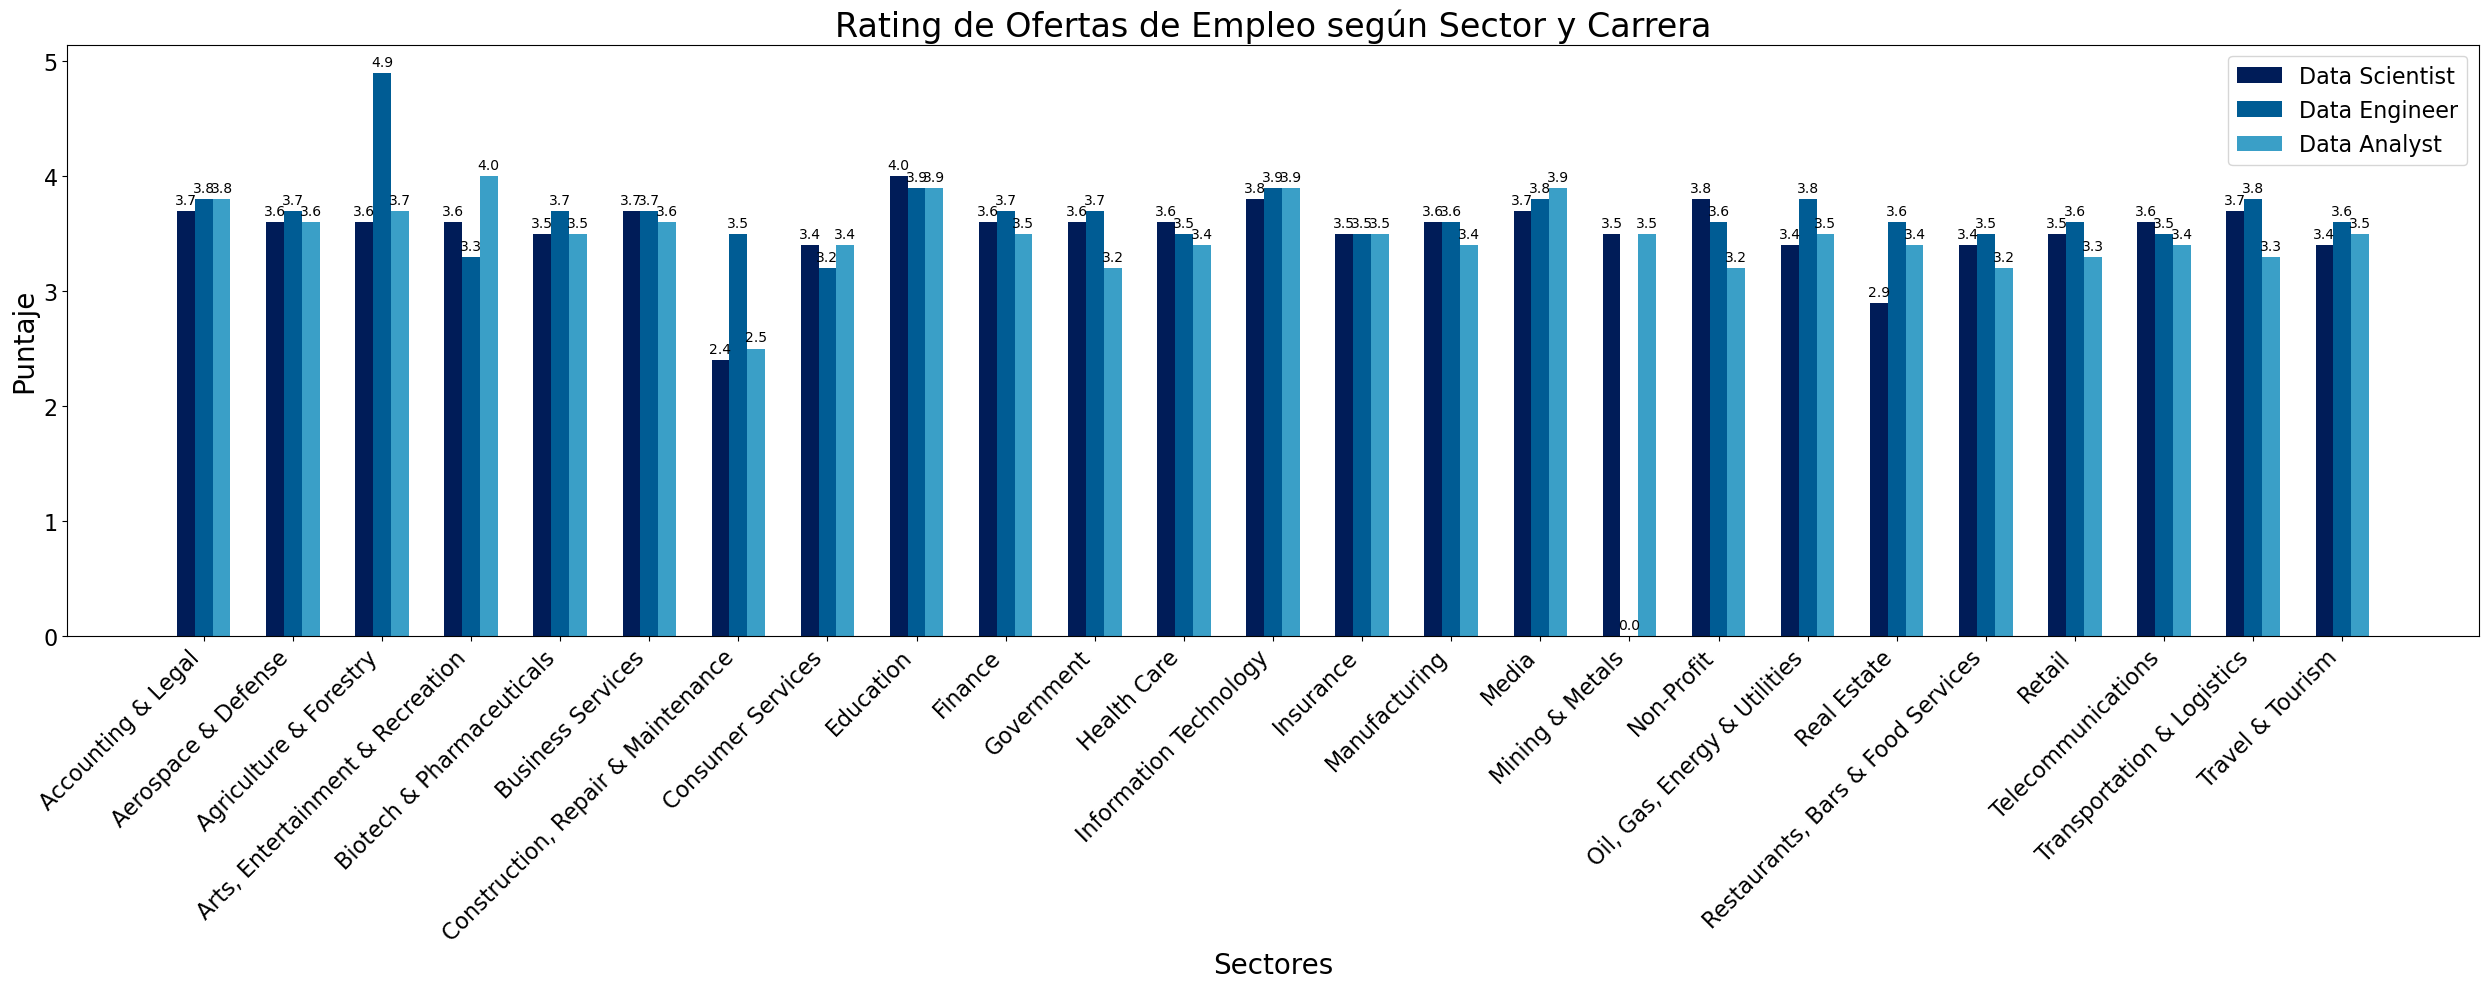

In [26]:
plt.rcParams['figure.figsize'] = [25, 10] 
fig, ax = plt.subplots()

w = 0.2
x = list(df[df['Sector'] != '-1']['Sector'].sort_values(ascending=True).unique())
rank = np.round(df[df['Sector'] != '-1'].pivot_table('Rating', index=['Sector'],columns=['Category'], aggfunc='mean', fill_value=0),1)

DA = []
DE = []
DS = []

for column in rank.columns.values:
    if column == 'Data Analyst':
        DA = rank[column].tolist()
    if column == 'Data Engineer':
        DE = rank[column].tolist()
    if column == 'Data Scientist':
        DS = rank[column].tolist()

bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
bar3 = [i+w for i in bar2]

graf1 = ax.bar(bar1, DS, w, color='#001c58', label='Data Scientist')
graf3 = ax.bar(bar2, DE, w, color='#005c94', label='Data Engineer')
graf2 = ax.bar(bar3, DA, w, color='#3a9fc7', label='Data Analyst')

ax.set_xlabel('Sectores', fontsize=20)
ax.set_ylabel('Puntaje', fontsize=20)
ax.set_title('Rating de Ofertas de Empleo según Sector y Carrera', fontsize=24)
plt.xticks(bar1+w, x, fontsize=16)
fig.autofmt_xdate(rotation=45)
plt.yticks(fontsize=16)
ax.legend(prop={'size': 16})

def autolabel(rects, xpos='center'):
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')

autolabel(graf1)
autolabel(graf2)
autolabel(graf3)

plt.tight_layout()
# fig.savefig("rating_sector_carrera.png")
plt.show();

## 10. Conclusiones

- A nivel general, la carrera de Data Scientist tiene un Salario Promedio Anual más alto, quedando en segundo lugar la carrera de Data Engineer y en tercer lugar la carrera de Data Analyst

- A nivel general, el sector que ofrece el Salario Promedio Anual más alto es el ***Biotech y Pharmaceuticals*** (Biotecnología y Farmacéutica), siendo el segundo sector con el Salario Promedio Anual más alto el de ***Media*** y finalmente el tercer sector con el salario promedio anual más alto el de ***Information Technology*** (Tecnologías de la Información)

- A nivel de sector, la carrera de Data Scientist tiene un Salario Promedio Anual más alto en el sector de ***Construction, Repair & Maintenance*** (Construcción, Reparación y Mantenimiento), quedándose con el segundo lugar en el sector de ***Media*** y en tercer lugar con los sectores de ***Consumer Services*** (Servicios al consumidor), ***Information Technology*** (Tecnologías de la Información) y ***Retail*** (Venta al detalle)

## 11. Oportunidades

- Es muy posible que el mayor potencial pueda ser encontrado en la descripción de las ofertas de trabajo.

- Es posible evaluar si los requerimientos (Job Description/Descripción del trabajo) afectan o influyen en el salario ofertado

- La posibilidad de determinar si los requerimientos, la compañía o el sector influyen en el rating de las ofertas de trabajo